In [1]:
import dpdata
import numpy as np
from deepmd.infer import DeepPot
import matplotlib.pyplot as plt 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
dp_short = DeepPot('../1-Short_training/frozen_model_compressed.pb')

2022-09-10 22:20:58.312527: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-10 22:20:58.313940: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-09-10 22:20:58.320263: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


With quick model trained by the user

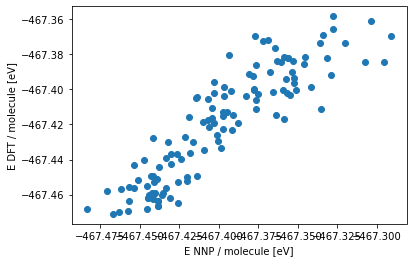

In [3]:
#system = dpdata.LabeledSystem('../1-Short_training/TrainingData/ice-and-liquid', fmt = 'deepmd/raw')
#e, f, v = dp_short.eval(system['coords'], system['cells'], system['atom_types'])
#energy_model = e.reshape([-1]) 
#energy_dft=np.genfromtxt("../1-Short_training/TrainingData/ice-and-liquid/energy.raw")
#number_of_molecules=96
#plt.scatter(energy_model/number_of_molecules,energy_dft/number_of_molecules)
#
system = dpdata.LabeledSystem('../1-Short_training/TrainingData/liquid-water-1', fmt = 'deepmd/raw')
e, f, v = dp_short.eval(system['coords'], system['cells'], system['atom_types'])
energy_model = e.reshape([-1]) 
energy_dft=np.genfromtxt("../1-Short_training/TrainingData/liquid-water-1/energy.raw")
number_of_molecules=64
plt.scatter(energy_model/number_of_molecules,energy_dft/number_of_molecules)
#
#system = dpdata.LabeledSystem('../1-Short_training/TrainingData/liquid-water-2', fmt = 'deepmd/raw')
#e, f, v = dp_short.eval(system['coords'], system['cells'], system['atom_types'])
#energy_model = e.reshape([-1]) 
#energy_dft=np.genfromtxt("../1-Short_training/TrainingData/liquid-water-2/energy.raw")
#number_of_molecules=288
#plt.scatter(energy_model/number_of_molecules,energy_dft/number_of_molecules)
#
plt.xlabel("E NNP / molecule [eV]")
plt.ylabel("E DFT / molecule [eV]")

plt.show()